# Применяем нейронную сеть для распознавания изображений моделей одежды

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование нейросетей на Python](https://www.asozykin.ru/courses/nnpython)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/introduction/fashion_mnist_recognition.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

## Загружаем предварительно обученную нейронную сеть

Закачиваем файл с обученной моделью

In [4]:
!wget https://github.com/sozykin/dlpython_course/raw/master/introduction/fashion_mnist_dense.h5 -O fashion_mnist_dense.h5

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Загружаем модель в память

In [5]:
model = load_model('fashion_mnist_dense.h5')

c:\Users\sozyk\projects\dlpython_course\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: Error when deserializing class 'Dense' using config={'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 800, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None, 'dtype': 'float32'}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {'dtype': 'float32'}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'input_shape': [None, 784]}.

Exception encountered: <class 'keras.src.initializers.random_initializers.GlorotUniform'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None, 'dtype': 'float32'}, 'registered_name': None}.

Exception encountered: GlorotUniform.__init__() got an unexpected keyword argument 'dtype'

In [6]:
model.summary()

NameError: name 'model' is not defined

## Загружаем в Colab изображение для распознавания

In [ ]:
f = files.upload()

Saving bag.jpg to bag.jpg


In [ ]:
!ls

fashion_mnist_dense.h5	sample_data  tshirt.jpg


In [ ]:
img_path = 'bag.jpg'

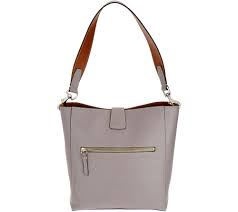

In [ ]:
Image(img_path, width=150, height=150)

## Распознаем изображение

Загружаем изображение из файла с помощью инструментов Keras

In [ ]:
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Предварительная обработка изображения

In [ ]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [ ]:
prediction = model.predict(x)

Результаты распознавания

In [ ]:
prediction

array([[1.0048650e-09, 1.2857140e-18, 4.3934003e-09, 4.0759669e-06,
        1.1158774e-09, 6.8090867e-12, 4.2181747e-09, 2.5657423e-10,
        9.9999595e-01, 1.8443560e-20]], dtype=float32)

In [ ]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 8
Название класса: сумка
